# Лабораторная работа № 1
### Боровских Вадим, 932003
## A) Бинарный Классификатор  bank-additional-full

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";", quotechar='"', index_col = 0)
df=df.reset_index() 
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


####  Возвращает названия всех столбцов в DataFrame

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Возвращает основную информации о DataFrame для определения, есть ли нулевые значения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Возвращает уникальные значения

In [5]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

#### Подсчет количества значений

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### Перекодировка целевого столбца в бинарные значения и удаление исходного столбца:

In [7]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [8]:
risk_dictionary_binary_class = {'married': 1, 'single': 0, 'divorced': 0, 'unknown': 0}
df['Marital Binary'] = df['marital'].map(risk_dictionary_binary_class)
df[['marital','Marital Binary']].head(41188)

,marital,Marital Binary
0,married,1
1,married,1
2,married,1
3,married,1
4,married,1
...,...,...
41183,married,1
41184,married,1
41185,married,1
41186,married,1


In [9]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [10]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Default Binary'] = df['default'].map(risk_dictionary_binary_class)
df[['default','Default Binary']].head(41188)

,default,Default Binary
0,no,0
1,unknown,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,no,0
41184,no,0
41185,no,0
41186,no,0


In [11]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Housing Binary'] = df['housing'].map(risk_dictionary_binary_class)
df[['housing','Housing Binary']].head(41188)

,housing,Housing Binary
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,yes,1
41186,no,0


In [13]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
risk_dictionary_binary_class = {'yes': 1,'no': 0, 'unknown': 0}
df['Loan Binary'] = df['loan'].map(risk_dictionary_binary_class)
df[['loan','Loan Binary']].head(41188)

,loan,Loan Binary
0,no,0
1,no,0
2,no,0
3,no,0
4,yes,1
...,...,...
41183,no,0
41184,no,0
41185,no,0
41186,no,0


In [15]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [16]:
risk_dictionary_binary_class = {'success': 2,'failure': 0, 'nonexistent': 1}
df['Poutcome Binary'] = df['poutcome'].map(risk_dictionary_binary_class)
df[['poutcome','Poutcome Binary']].head(41188)

,poutcome,Poutcome Binary
0,nonexistent,1
1,nonexistent,1
2,nonexistent,1
3,nonexistent,1
4,nonexistent,1
...,...,...
41183,nonexistent,1
41184,nonexistent,1
41185,nonexistent,1
41186,nonexistent,1


#### Перекодировка целевого столбца 'y' в бинарные значения и удаление исходного столбца 'y':

In [17]:
risk_dictionary_binary_class = {'yes': 1, 'no': 0}
df['Target Binary'] = df['y'].map(risk_dictionary_binary_class)
df[['y','Target Binary']].head(41188)

,y,Target Binary
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,no,0
41186,yes,1


In [18]:
X = df.drop(['y','job','education','marital','education','default','housing','loan','month','contact','day_of_week','poutcome','Target Binary'],axis=1)
y = df['Target Binary']

In [19]:
print(y.isnull().sum())

0


In [20]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Marital Binary,Default Binary,Housing Binary,Loan Binary,Poutcome Binary
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1


#### Преобразование категориальных данных с помощью  и масштабирование данных:

In [33]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

#### Разделение данных на тренировочный, тестовый и валидационный наборы:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (32950, 15), Test : (8238, 15)
Train : (26360, 15), Test : (6590, 15)


#### Обучение модели с использованием Keras. Создание модели нейронной сети, ее компиляция:

In [35]:
binary_classifier = Sequential()
binary_classifier.add(Dense(units=4,activation='relu',input_dim=15))
binary_classifier.add(Dense(units=1,activation='sigmoid'))

In [36]:
binary_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 69 (276.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
binary_classifier.compile(loss='binary_crossentropy',optimizer='adam',
                          metrics='accuracy')

In [38]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',verbose=1)
checkpoint = ModelCheckpoint('C:/Users/vvadi/DeepLearning/Binary_Classifier-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

#### Обучение модели

In [54]:
binary_classifier_history = binary_classifier.fit(X_train, y_train, batch_size=10,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=40)


Epoch 1/40
2624/2636 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9050
Epoch 1: val_accuracy did not improve from 0.90926
2636/2636 [==============================] - 12s 5ms/step - loss: 0.2106 - accuracy: 0.9050 - val_loss: 0.2057 - val_accuracy: 0.9061
Epoch 2/40
2632/2636 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9047
Epoch 2: val_accuracy did not improve from 0.90926
2636/2636 [==============================] - 12s 5ms/step - loss: 0.2115 - accuracy: 0.9047 - val_loss: 0.2077 - val_accuracy: 0.9067
Epoch 3/40
2636/2636 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.9068
Epoch 3: val_accuracy did not improve from 0.90926
2636/2636 [==============================] - 12s 5ms/step - loss: 0.2108 - accuracy: 0.9068 - val_loss: 0.2113 - val_accuracy: 0.9036
Epoch 4/40
2631/2636 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9064
Epoch 4: val_accuracy did not improve from 0.90926
26

#### Построение графика потери

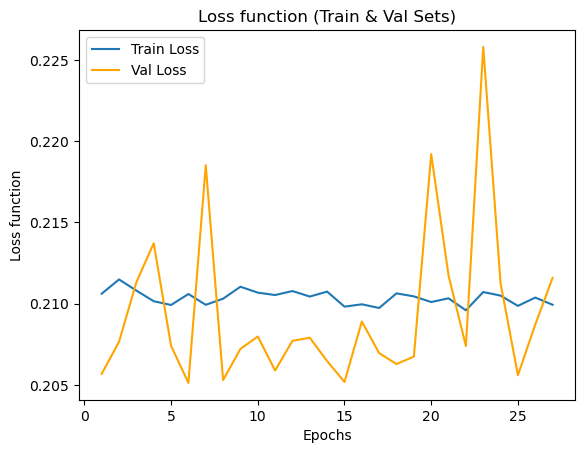

In [55]:
loss_function = binary_classifier_history.history['loss']
val_loss_function = binary_classifier_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

#### Построение графика точности в процессе обучения

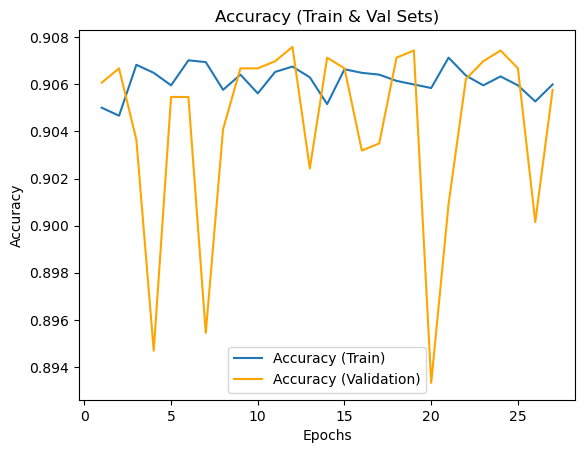

In [56]:
acc = binary_classifier_history.history['accuracy']
val_acc = binary_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Тестирование модели на тестовых данных и предсказание класса для конкретного образца:

In [57]:

# load a saved model
#from keras.models import load_model
#saved_model = load_model('best_model.h5')
binary_classifier.load_weights('C:/Users/vvadi/DeepLearning/Binary_Classifier-19-0.909.hdf5')

In [58]:
results = binary_classifier.evaluate(X_test,y_test)

258/258 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9093


In [59]:
#x_test_pattern = X_test[1,:]
#y_pred = binary_classifier.predict(x_test_pattern.reshape(1,-1))
x_test_pattern = X_test.iloc[1]
x_test_pattern = x_test_pattern.values.reshape(1,-1)
y_pred = binary_classifier.predict(x_test_pattern)
print(y_pred[0])

1/1 [==============================] - 0s 50ms/step
[0.00019114]


In [60]:
y_test

17589    0
3158     0
2118     0
12435    0
13939    0
        ..
33427    0
32280    0
25947    0
13050    0
39975    1
Name: Target Binary, Length: 8238, dtype: int64

In [61]:
print(x_test_pattern)

[[ 5.2000e+01  3.6000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00
   9.3994e+01 -3.6400e+01  4.8600e+00  5.1910e+03  1.0000e+00  0.0000e+00
   1.0000e+00  0.0000e+00  1.0000e+00]]


#### Возврат особенностей тестового набора данных к их исходному масштабу:

In [62]:
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
original_features

array([[ 4.22900000e+03,  1.77048000e+05,  5.60000000e+01,
         9.98001000e+05,  0.00000000e+00,  1.88000000e+00,
         3.33389604e+02, -9.20760000e+02,  2.20714600e+01,
         1.37798310e+06,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.00000000e+00]])

### Метрики работы Recall, Precision, Weighted Accuracy, AUC

In [63]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, accuracy_score

# Делаем предсказания
y_pred = binary_classifier.predict(X_test)
#y_pred = np.round(y_pred)
y_pred = (y_pred > 0.5).astype(int).reshape(y_test.shape)


# Вычисляем метрики
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Вычисляем accuracy для каждого класса и получаем средневзвешенное значение
cm = confusion_matrix(y_test, y_pred)
class_wise = cm.diagonal()/cm.sum(axis=1)
weighted_accuracy = np.average(class_wise, weights=cm.sum(axis=1))

print(f"Recall: {recall}\nPrecision: {precision}\nAUC: {auc}\nWeighted Accuracy: {weighted_accuracy}")

258/258 [==============================] - 1s 3ms/step
Recall: 0.41810344827586204
Precision: 0.6521008403361345
AUC: 0.6948930374074249
Weighted Accuracy: 0.9093226511289147


#### Расчет значений для ROC-кривой и AUC

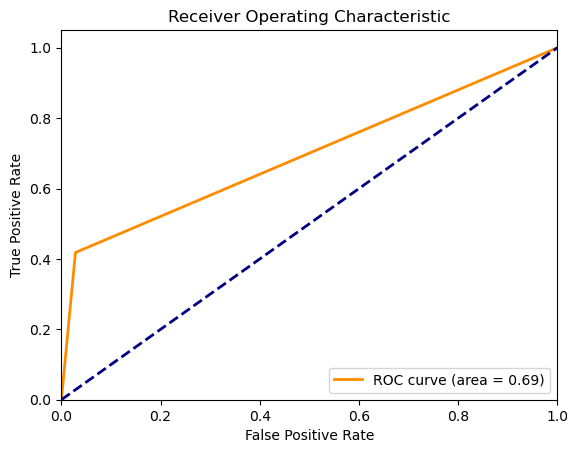

     Recall  Precision       AUC  Weighted Accuracy
0  0.418103   0.652101  0.694893           0.909323


In [64]:
# Расчет значений для ROC-кривой и AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Отображение ROC-кривой
plt.show()

# Отображение метрик в виде датафрейма
metrics_df = pd.DataFrame(data={"Recall": [recall], "Precision": [precision], "AUC": [auc], "Weighted Accuracy": [weighted_accuracy]})
print(metrics_df.head())